In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import scipy.optimize as spy
%matplotlib inline

In [24]:
num_agents = 1000; # number of members partaking in transactions
m0 = 1000; # average money per agent, will also be the starting money
beta = 1/m0 # equation variable
money_tot = m0 * num_agents # total money, will be conserved

In [25]:
# transaction quantification value epsilon
def epsilon():
    return np.round(np.random.uniform(0,1),2)

# used to asign transactions between two random agents
def rand_agent():
    return np.int(np.round(np.random.uniform(0,num_agents - 1),0))

# vector container for all agents with starting money, m0
def agent():
    agents = np.zeros(num_agents);
    agents += m0;
    return agents

In [26]:
def transactions(agents,num,gamma, alpha):
    i = 0
    while i < num:
        #exchange quantifier and agent identification
        ep = epsilon()
        one = rand_agent()
        two = rand_agent()
        if one == two:
            two = rand_agent()
        
        #assign wealth values and the delM value
        Mone = agents[one]
        Mtwo = agents[two]
        Msum = Mone + Mtwo
        dM = np.round((1 - gamma) * (ep * Mtwo - (1 - ep) * Mone),2)
        
        #determine if a transaction will occur
        nearestfriend = np.abs(Mone - Mtwo)**(-alpha)
        chance = np.random.uniform(0,1)
        if nearestfriend > 1:
            Moneprime = Mone + dM
            Mtwoprime= Mtwo - dM
                        #update agent wealth
            agents[one] = Moneprime
            agents[two] = Mtwoprime
        elif chance <= nearestfriend:
            Moneprime = Mone + dM
            Mtwoprime= Mtwo - dM
        
            #update agent wealth
            agents[one] = Moneprime
            agents[two] = Mtwoprime
        else:
            pass
        
        i += 1

In [27]:
def history(vector,num,alpha):
    wealth = vector
    plt.figure('histogram')
    n, bins, patches = plt.hist(vector, 50, alpha=0, normed=1)
    n = np.append(n,0)
    #plt.title('Wealth Distribution after: ' + str(num) + ' transactions')
    plt.xlabel('Wealth [Dollars]')
    plt.ylabel('Occurance')
    y = mlab.normpdf(bins,np.average(vector),np.std(vector))
    #plt.plot(bins,y,'r--', label='alpha = '+str(alpha))
    #plt.legend()
    #plt.show()
    return n, bins, y

In [28]:
def repitition(num,gamma,alpha):
    rep = 0
    loss = 0
    check = 0
    vector = agent()
    # to check for equilibrium we calculate the new mean after successive simulations and wait for delW_avg = 0.05 %
    while check < 1:
        # to ensure the conservation of wealth we introduce an if statement for money loss
        if np.abs(loss) < 1:
            std_old = np.std(vector)
            transactions(vector,num,gamma,alpha)
            money_after = sum(vector)
            loss = money_tot - money_after
            rep += 1
            agents = vector
            std_new = np.std(vector)
            if np.abs((std_new - std_old)/std_old) < 0.005:
                check = 1
                print('Equilibrium: established')
                print('std of wealth: ', std_new)
                print('rep count: ', rep)
            else:
                pass
        else:
            check = 1
            print('money is not being conserved')
            print('net difference: ', loss)
            print('failed with rep count: ', rep)

    return agents

## N = 500

In [29]:
num_agents = 500; # number of members partaking in transactions
m0 = 1000; # average money per agent, will also be the starting money
beta = 1/m0 # equation variable
money_tot = m0 * num_agents # total money, will be conserved

C:\Users\samme\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\samme\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: RuntimeWarning: divide by zero encountered in double_scalars


money is not being conserved
net difference:  -8.28999999986
failed with rep count:  18


ValueError: too many values to unpack (expected 2)

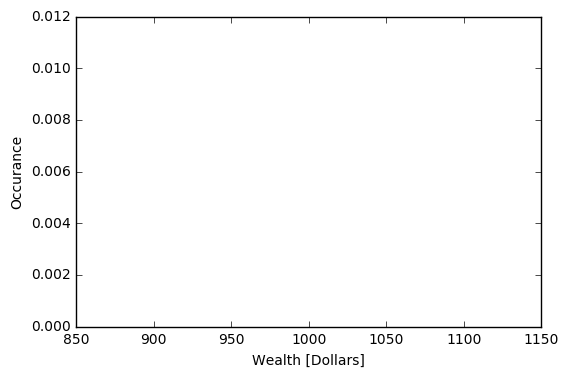

In [30]:
num = 10**4
gamma = 0.99
alpha = 0.99
agents = repitition(num,gamma,alpha)
n, bins = history(agents,num,alpha)

<IPython.core.display.Javascript object>


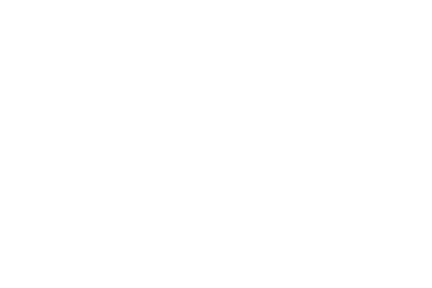

C:\Users\samme\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\samme\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: RuntimeWarning: divide by zero encountered in double_scalars


money is not being conserved
net difference:  -212.44
failed with rep count:  9


<IPython.core.display.Javascript object>


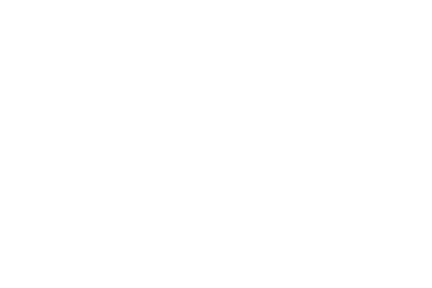

Equilibrium: established
std of wealth:  779.094933622
rep count:  27
money is not being conserved
net difference:  -360.0
failed with rep count:  2
money is not being conserved
net difference:  -198.94
failed with rep count:  1


<function matplotlib.pyplot.show>

<IPython.core.display.Javascript object>


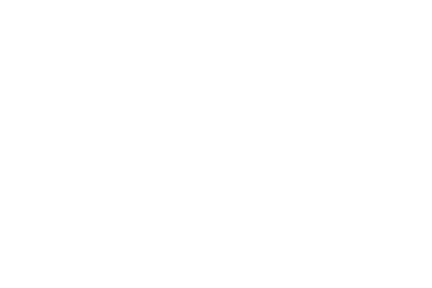

<IPython.core.display.Javascript object>


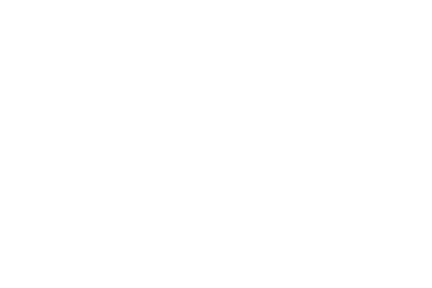

In [22]:
num = 10**4
gamma = .5
alpha = [0.5,1,1.5,2]
color = ['red','blue','green','purple']
fig = plt.figure('multi-gamma')
for i in np.arange(len(alpha)):
    value = alpha[i]
    agents = repitition(num,gamma,value)
    data = history(agents,num,value)
    plt.loglog(data[1],data[2],'r--',lw=2,label='alpha = '+str(value),color=color[i])
    plt.hold(True)
plt.xlabel('Wealth [$]')
plt.ylabel('Occurance')
plt.legend(loc=3,fontsize=36)
plt.show